In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from __future__ import print_function

In [2]:
# Đặt seed để tái lập kết quả ngẫu nhiên
np.random.seed(2)
print(np.random.randn(3))

[-0.41675785 -0.05626683 -2.1361961 ]


In [3]:
means = [[2, 2], [4, 2]] # Toạ độ trung tâm của cụm
cov = [[0.3, 0.2], [0.2, 0.3]]
N = 10 # Số điểm dữ liệu

In [4]:
#Tạo dữ liệu random quanh tâm
X0 = np.random.multivariate_normal(means[0], cov, N).T # X0.shape là 2, N
X1 = np.random.multivariate_normal(means[1], cov, N).T # X1.shape là 2, N

print(X0, X1)

[[1.58088898 2.30842598 2.85920935 2.33119493 0.8446075  2.43842562
  2.30235756 1.57972842 2.19183827 2.02084619]
 [0.77884021 2.53332139 2.38607874 2.57781268 0.86318448 2.67949983
  2.29380214 1.24527036 1.79913648 2.13558798]] [[4.57015242 4.26067601 4.91159998 4.13691056 3.42874719 3.86080283
  3.20796439 4.42210467 3.79892628 4.0322119 ]
 [2.41862663 1.97550802 2.27601231 2.01658463 0.33988602 2.02647066
  1.43240175 2.42210903 1.65872115 1.19677636]]


In [5]:
# Ghép 2 dữ liệu thành ma trận (2, 2N)
X = np.concatenate((X0, X1), axis = 1)
print(X)

[[1.58088898 2.30842598 2.85920935 2.33119493 0.8446075  2.43842562
  2.30235756 1.57972842 2.19183827 2.02084619 4.57015242 4.26067601
  4.91159998 4.13691056 3.42874719 3.86080283 3.20796439 4.42210467
  3.79892628 4.0322119 ]
 [0.77884021 2.53332139 2.38607874 2.57781268 0.86318448 2.67949983
  2.29380214 1.24527036 1.79913648 2.13558798 2.41862663 1.97550802
  2.27601231 2.01658463 0.33988602 2.02647066 1.43240175 2.42210903
  1.65872115 1.19677636]]


In [6]:
# Tạo nhãn 1 cho X0 và -1 cho X1
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # y.shape là 1, 2N
print(y)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1.]]


In [7]:
# Ghép dữ liệu và nhãn thành ma trận (3, 2N)
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
print(X)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [1.58088898 2.30842598 2.85920935 2.33119493 0.8446075  2.43842562
  2.30235756 1.57972842 2.19183827 2.02084619 4.57015242 4.26067601
  4.91159998 4.13691056 3.42874719 3.86080283 3.20796439 4.42210467
  3.79892628 4.0322119 ]
 [0.77884021 2.53332139 2.38607874 2.57781268 0.86318448 2.67949983
  2.29380214 1.24527036 1.79913648 2.13558798 2.41862663 1.97550802
  2.27601231 2.01658463 0.33988602 2.02647066 1.43240175 2.42210903
  1.65872115 1.19677636]]


In [8]:
# Hàm tính giá trị dự đoán
def h(w, x):
    return np.sign(np.dot(w.T, x)) 

In [9]:
# Hàm kiểm tra điều kiện hội tụ
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

In [10]:
# Thuật toán Perceptron
def perceptron(X, y, w_init):
    w = [w_init] # w ban đầu
    d = X.shape[0] # Số chiều của dữ liệu
    N = X.shape[1] # Số lượng mẫu
    mis_points = [] # Mẫu bị loại
    while True:
        mix_id = np.random.permutation(N) # Xáo trộn dữ liệu để chắc chắn rằng thuật toán không phụ thuộc vào vị trí mẫu
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1) # Lấy điểm dữ liệu xi (lấy hết giá trị ở hàng x cột i) và reshape lại thành ma trận d, 1
            yi = y[0, mix_id[i]] # Nhãn tương ứng
            if h(w[-1], xi)[0] != yi: # Nếu nhãn tính được khác nhãn tương ứng
                mis_points.append(mix_id[i]) # Thì đẩy vào arr mẫu bị loại
                w_new = w[-1] + xi*yi # Cập nhật lại w
                w.append(w_new) # Lưu vào arr w
        if has_converged(X, y, w[-1]): # Néu nhãn của tất cả các mẫu đúng
            break # Thì break
    return (w, mis_points)

([array([[ 1.73118467],
       [ 1.46767801],
       [-0.33567734]]), array([[ 0.73118467],
       [-3.10247441],
       [-2.75430397]]), array([[ 1.73118467],
       [-1.52158542],
       [-1.97546376]]), array([[ 2.73118467],
       [ 0.05814299],
       [-0.7301934 ]]), array([[ 1.73118467],
       [-3.37060419],
       [-1.07007942]]), array([[ 2.73118467],
       [-0.51139484],
       [ 1.31599931]]), array([[ 1.73118467],
       [-4.6483054 ],
       [-0.70058532]]), array([[ 2.73118467],
       [-2.62745922],
       [ 1.43500266]]), array([[ 3.73118467],
       [-0.43562095],
       [ 3.23413914]]), array([[ 2.73118467],
       [-4.23454723],
       [ 1.57541799]]), array([[ 3.73118467],
       [-1.93218967],
       [ 3.86922013]]), array([[ 2.73118467],
       [-6.84378964],
       [ 1.59320782]]), array([[ 3.73118467],
       [-3.98458029],
       [ 3.97928656]])], [np.int32(10), np.int32(0), np.int32(7), np.int32(14), np.int32(2), np.int32(13), np.int32(9), np.int32(8), np.in

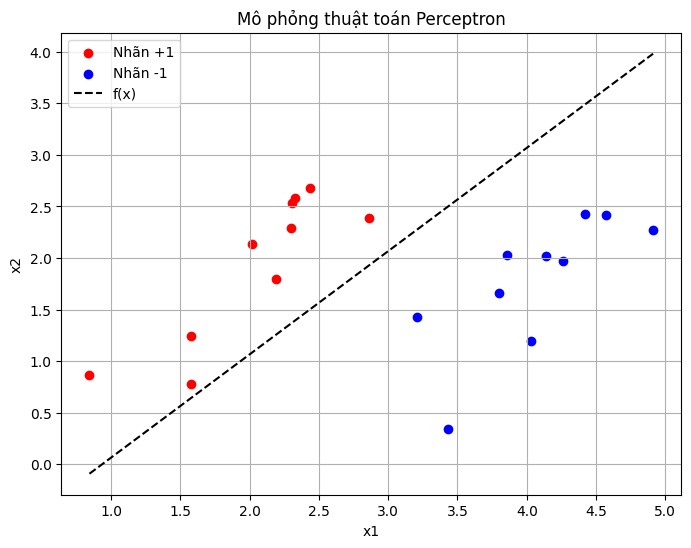

In [11]:
# Khởi tạo w ngẫu nhiên và chạy thuật toán Perceptron
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)

print((w, m))

# Vẽ đồ thị 2D
plt.figure(figsize=(8, 6))

# Vẽ các điểm dữ liệu của hai lớp
plt.scatter(X[1, :N], X[2, :N], color='red', label="Nhãn +1")
plt.scatter(X[1, N:], X[2, N:], color='blue', label="Nhãn -1")

# Tính giá trị x1 x2 của đường thẳng
x1_range = np.linspace(min(X[1]), max(X[1]), 100)
x2_boundary = (-w[-1][1] / w[-1][2]) * x1_range - (w[-1][0] / w[-1][2])

# Vẽ đường thẳng
plt.plot(x1_range, x2_boundary, 'k--', label="f(x)")

# Định dạng đồ thị
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Mô phỏng thuật toán Perceptron")
plt.legend()
plt.grid()
plt.show()

In [12]:
from sklearn.svm import SVC

# Sử dụng SVM từ sklearn để tìm siêu phẳng phân tách tối ưu
y1 = y.reshape((2*N,)) # Chuyển y về vector 1D
X1 = X.T # Chuyển X về dạng mà sklearn có thể xử lý (mỗi dòng là một mẫu)
clf = SVC(kernel = 'linear', C = 1e5) # C = 1e5 giúp đảm bảo hard margin

print(X1, y1)

# Huấn luyện mô hình SVM
clf.fit(X1, y1) 

# Lấy các tham số của siêu phẳng phân tách
w = clf.coef_
b = clf.intercept_
print('w = ', w)
print('b = ', b)

[[1.         1.58088898 0.77884021]
 [1.         2.30842598 2.53332139]
 [1.         2.85920935 2.38607874]
 [1.         2.33119493 2.57781268]
 [1.         0.8446075  0.86318448]
 [1.         2.43842562 2.67949983]
 [1.         2.30235756 2.29380214]
 [1.         1.57972842 1.24527036]
 [1.         2.19183827 1.79913648]
 [1.         2.02084619 2.13558798]
 [1.         4.57015242 2.41862663]
 [1.         4.26067601 1.97550802]
 [1.         4.91159998 2.27601231]
 [1.         4.13691056 2.01658463]
 [1.         3.42874719 0.33988602]
 [1.         3.86080283 2.02647066]
 [1.         3.20796439 1.43240175]
 [1.         4.42210467 2.42210903]
 [1.         3.79892628 1.65872115]
 [1.         4.0322119  1.19677636]] [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]
w =  [[ 4.44089210e-16 -1.80543473e+00  1.43595575e+00]]
b =  [2.73550963]


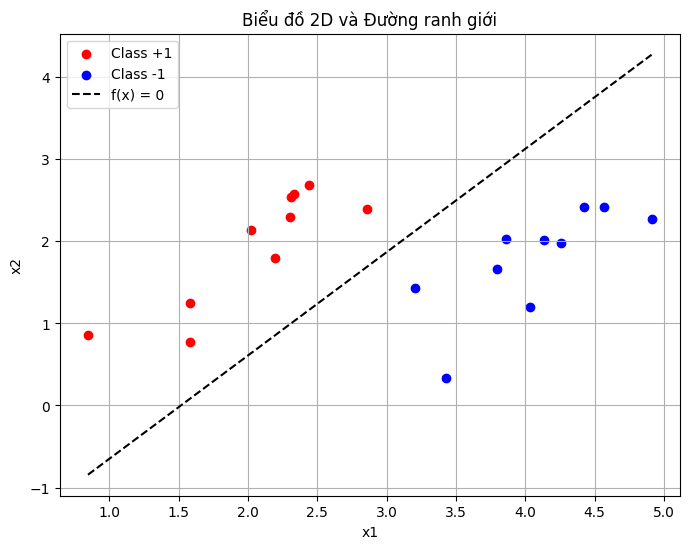

In [13]:
# Vẽ đồ thị 2D
plt.figure(figsize=(8, 6))

# Vẽ các điểm dữ liệu của hai lớp
plt.scatter(X[1, :N], X[2, :N], color='red', label="Class +1")
plt.scatter(X[1, N:], X[2, N:], color='blue', label="Class -1")

# Tính giá trị x1 x2 của đường thẳng
x1_range = np.linspace(min(X[1]), max(X[1]), 100)
x2_boundary = (-w[0][1] / w[0][2]) * x1_range - (b / w[0][2])

# Vẽ đường thẳng
plt.plot(x1_range, x2_boundary, 'k--', label="f(x) = 0")

# Định dạng đồ thị
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Biểu đồ 2D và Đường ranh giới")
plt.legend()
plt.grid()
plt.show()